In [17]:
import sys

sys.path.insert(0, '/home/LC/kollad01/gray_fox/scripts')
from ANGSD_to_ML1 import *

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA

In [18]:
from pyclustering.cluster.kmeans import kmeans

In [19]:
bamID_to_sampleID = pd.read_csv('./data/meta/bamID_to_sampleID.csv',header=None)
X = ANGSD_to_ML1('./data/genotype/geno_vcf.geno', bamID_to_sampleID)

In [4]:
X

,0,1,2,3,4,5,6,7,8,9,...,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545
1,,,,,,,,,,,,,,,,,,,,,
ucin246z,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,2.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.000000,0.0
ucin213conc,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,2.0,1.0,...,2.0,0.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.000000,0.0
ucin153conc,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ucin266reconc,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0
828RE,0.0,0.0,0.0,2.0,2.0,0.000000,1.000000,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ucin349conc,0.0,1.0,0.0,2.0,2.0,0.000000,0.000000,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.101449,1.0
ucin408re,0.0,2.0,0.0,2.0,2.0,0.204663,0.208333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ucin431z,0.0,1.0,1.0,2.0,2.0,0.000000,1.000000,1.0,1.0,0.0,...,1.0,2.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.000000,1.0


### K-means

In [5]:
def k_means_and_plot(X, k):
    kmeans = KMeans(n_clusters = k, n_init= 50, max_iter=100, random_state=42)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_
    
    score = silhouette_score(X, kmeans_labels, metric = 'euclidean')

    reduction_obj = PCA(n_components = 2, random_state = 42)
    transformed = reduction_obj.fit_transform(X)

    plt.xlabel(f'Axis 1 ({round(reduction_obj.explained_variance_[0],2)}%)')
    plt.ylabel(f'Axis 2 ({round(reduction_obj.explained_variance_[1],2)}%)')

    transformed_df = pd.DataFrame(transformed)
    transformed_df['cluster'] = kmeans.labels_ 

    for cluster_idx in range(k):
        cluster = transformed_df.loc[transformed_df.cluster == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
    
    plt.legend()
    plt.title(f'k = {k}.    Silhouette score : {round(score,3)}')
    
    return kmeans

CPU times: user 6min 1s, sys: 15min 13s, total: 21min 14s
Wall time: 33.2 s


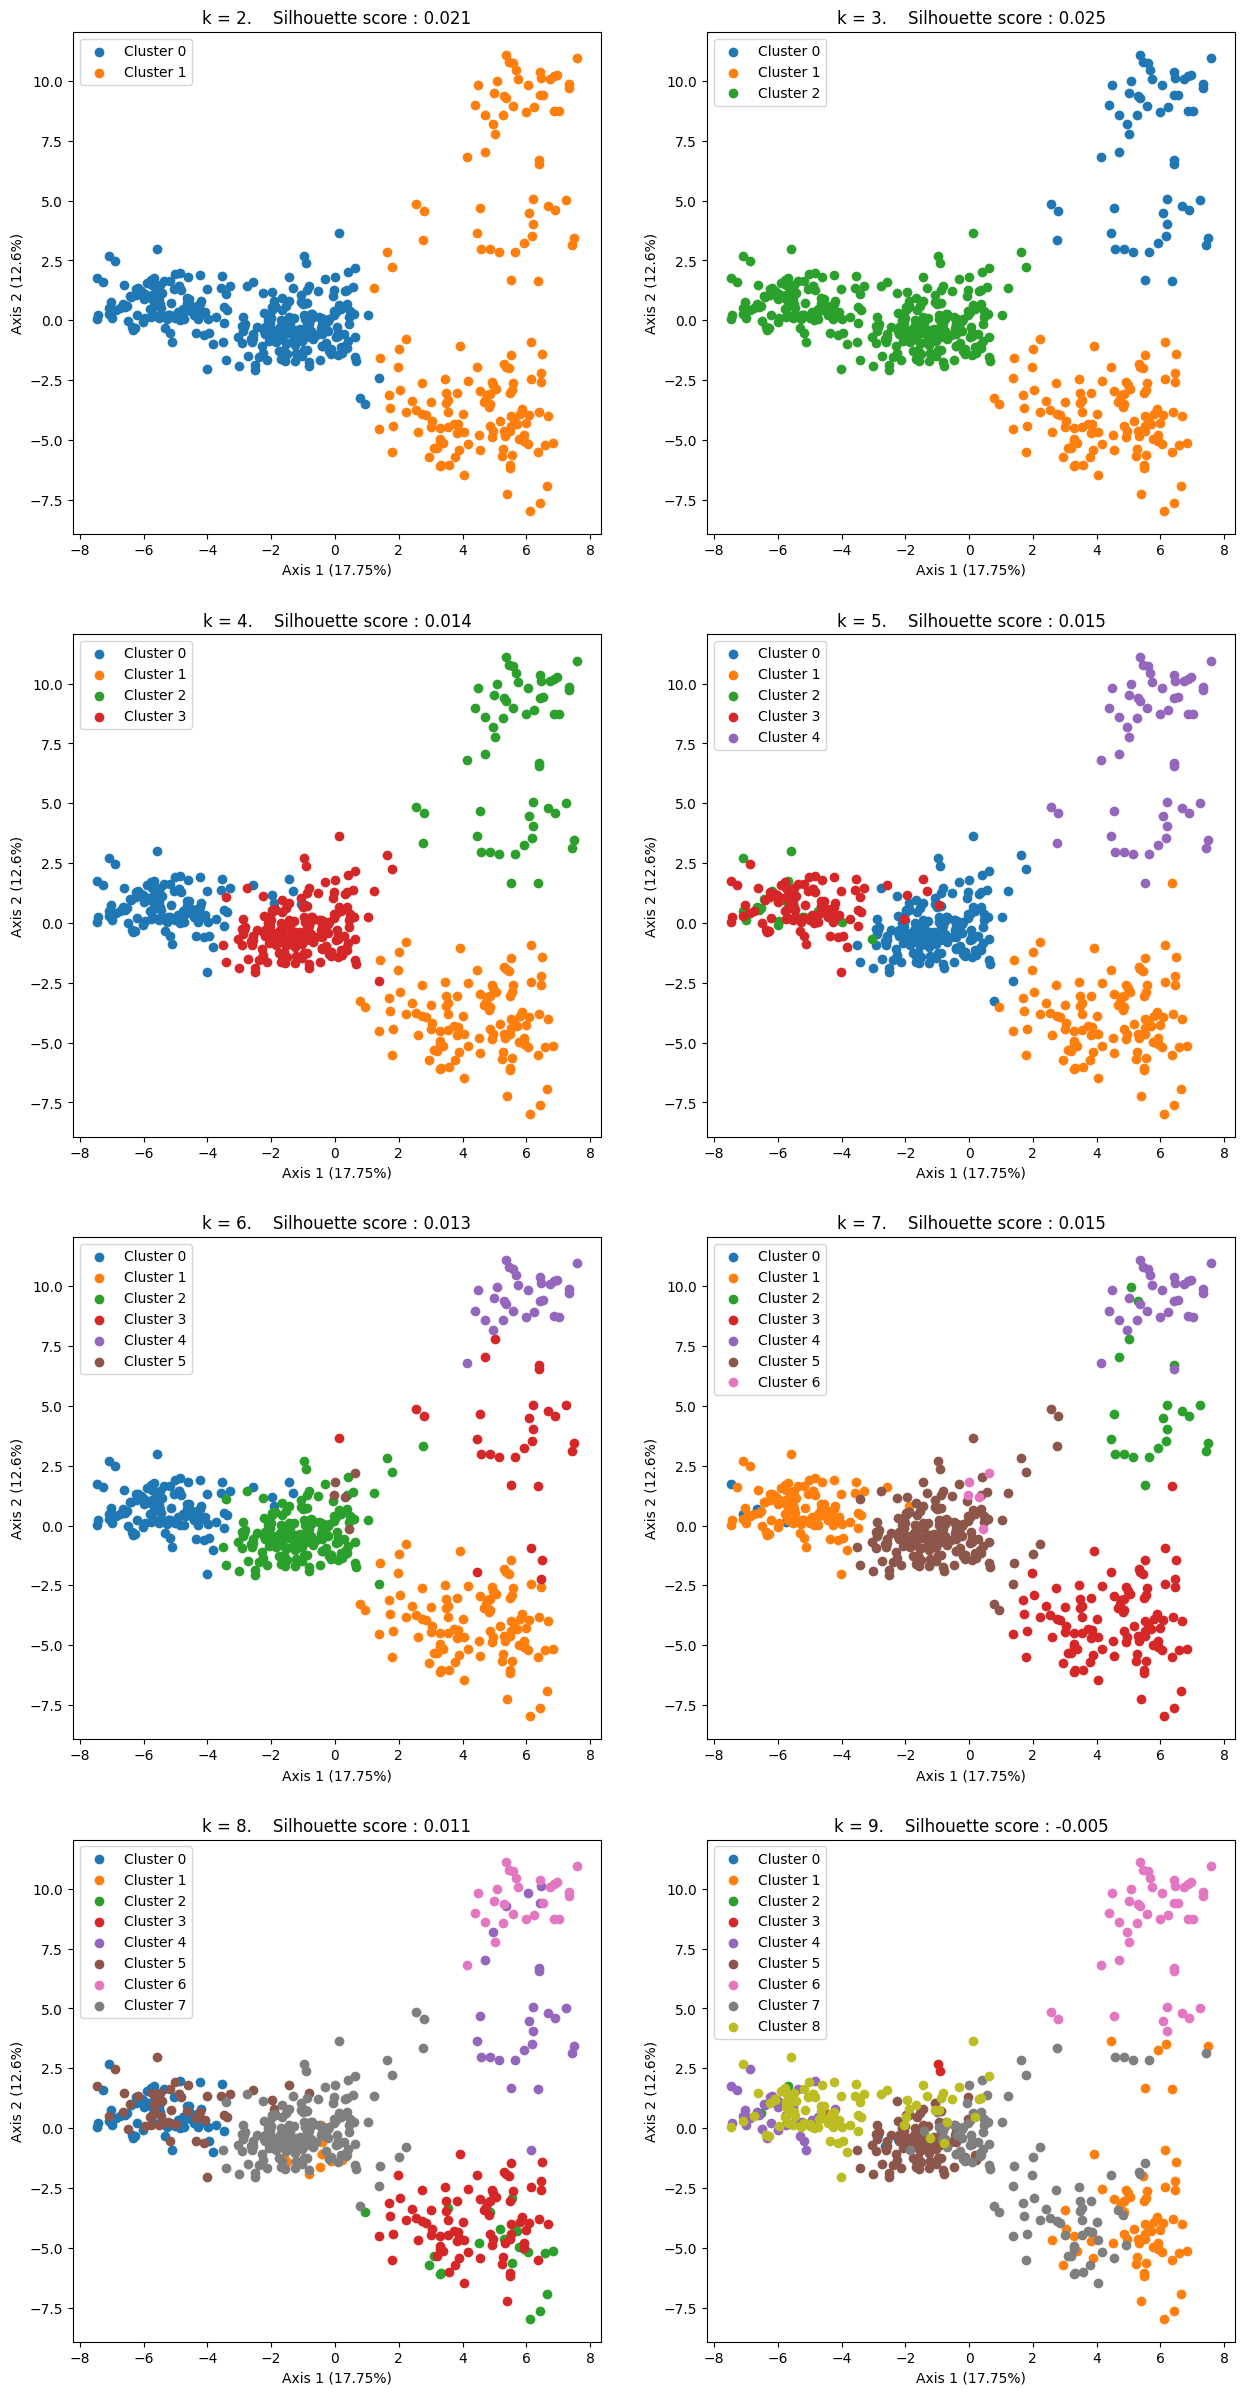

In [6]:
%%time
plt.figure(figsize=(15, 30))
for k in [2,3,4,5,6,7,8,9]:
    plt.subplot(4,2,k-1)
    k_means_and_plot(X,k)

### Hierarchial Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
def hierarchial_and_plot(X, k):
    hierarchial = AgglomerativeClustering(n_clusters = k, 
                                     linkage = 'ward',
                                     distance_threshold =None)
    hierarchial.fit(X)
    hierarchial_labels = hierarchial.labels_    
    
    score = silhouette_score(X, hierarchial_labels, metric = 'euclidean')
    
    reduction_obj = PCA(n_components = 2, random_state = 42)
    transformed = reduction_obj.fit_transform(X)

    plt.xlabel(f'Axis 1 ({round(reduction_obj.explained_variance_[0],2)}%)')
    plt.ylabel(f'Axis 2 ({round(reduction_obj.explained_variance_[1],2)}%)')

    transformed_df = pd.DataFrame(transformed)
    transformed_df['cluster'] = hierarchial.labels_ 

    for cluster_idx in range(k):
        cluster = transformed_df.loc[transformed_df.cluster == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
    
    plt.legend()
    plt.title(f'k = {k}.    Silhouette score : {round(score,3)}')
    
    return hierarchial

CPU times: user 13.4 s, sys: 45.4 s, total: 58.7 s
Wall time: 2.95 s


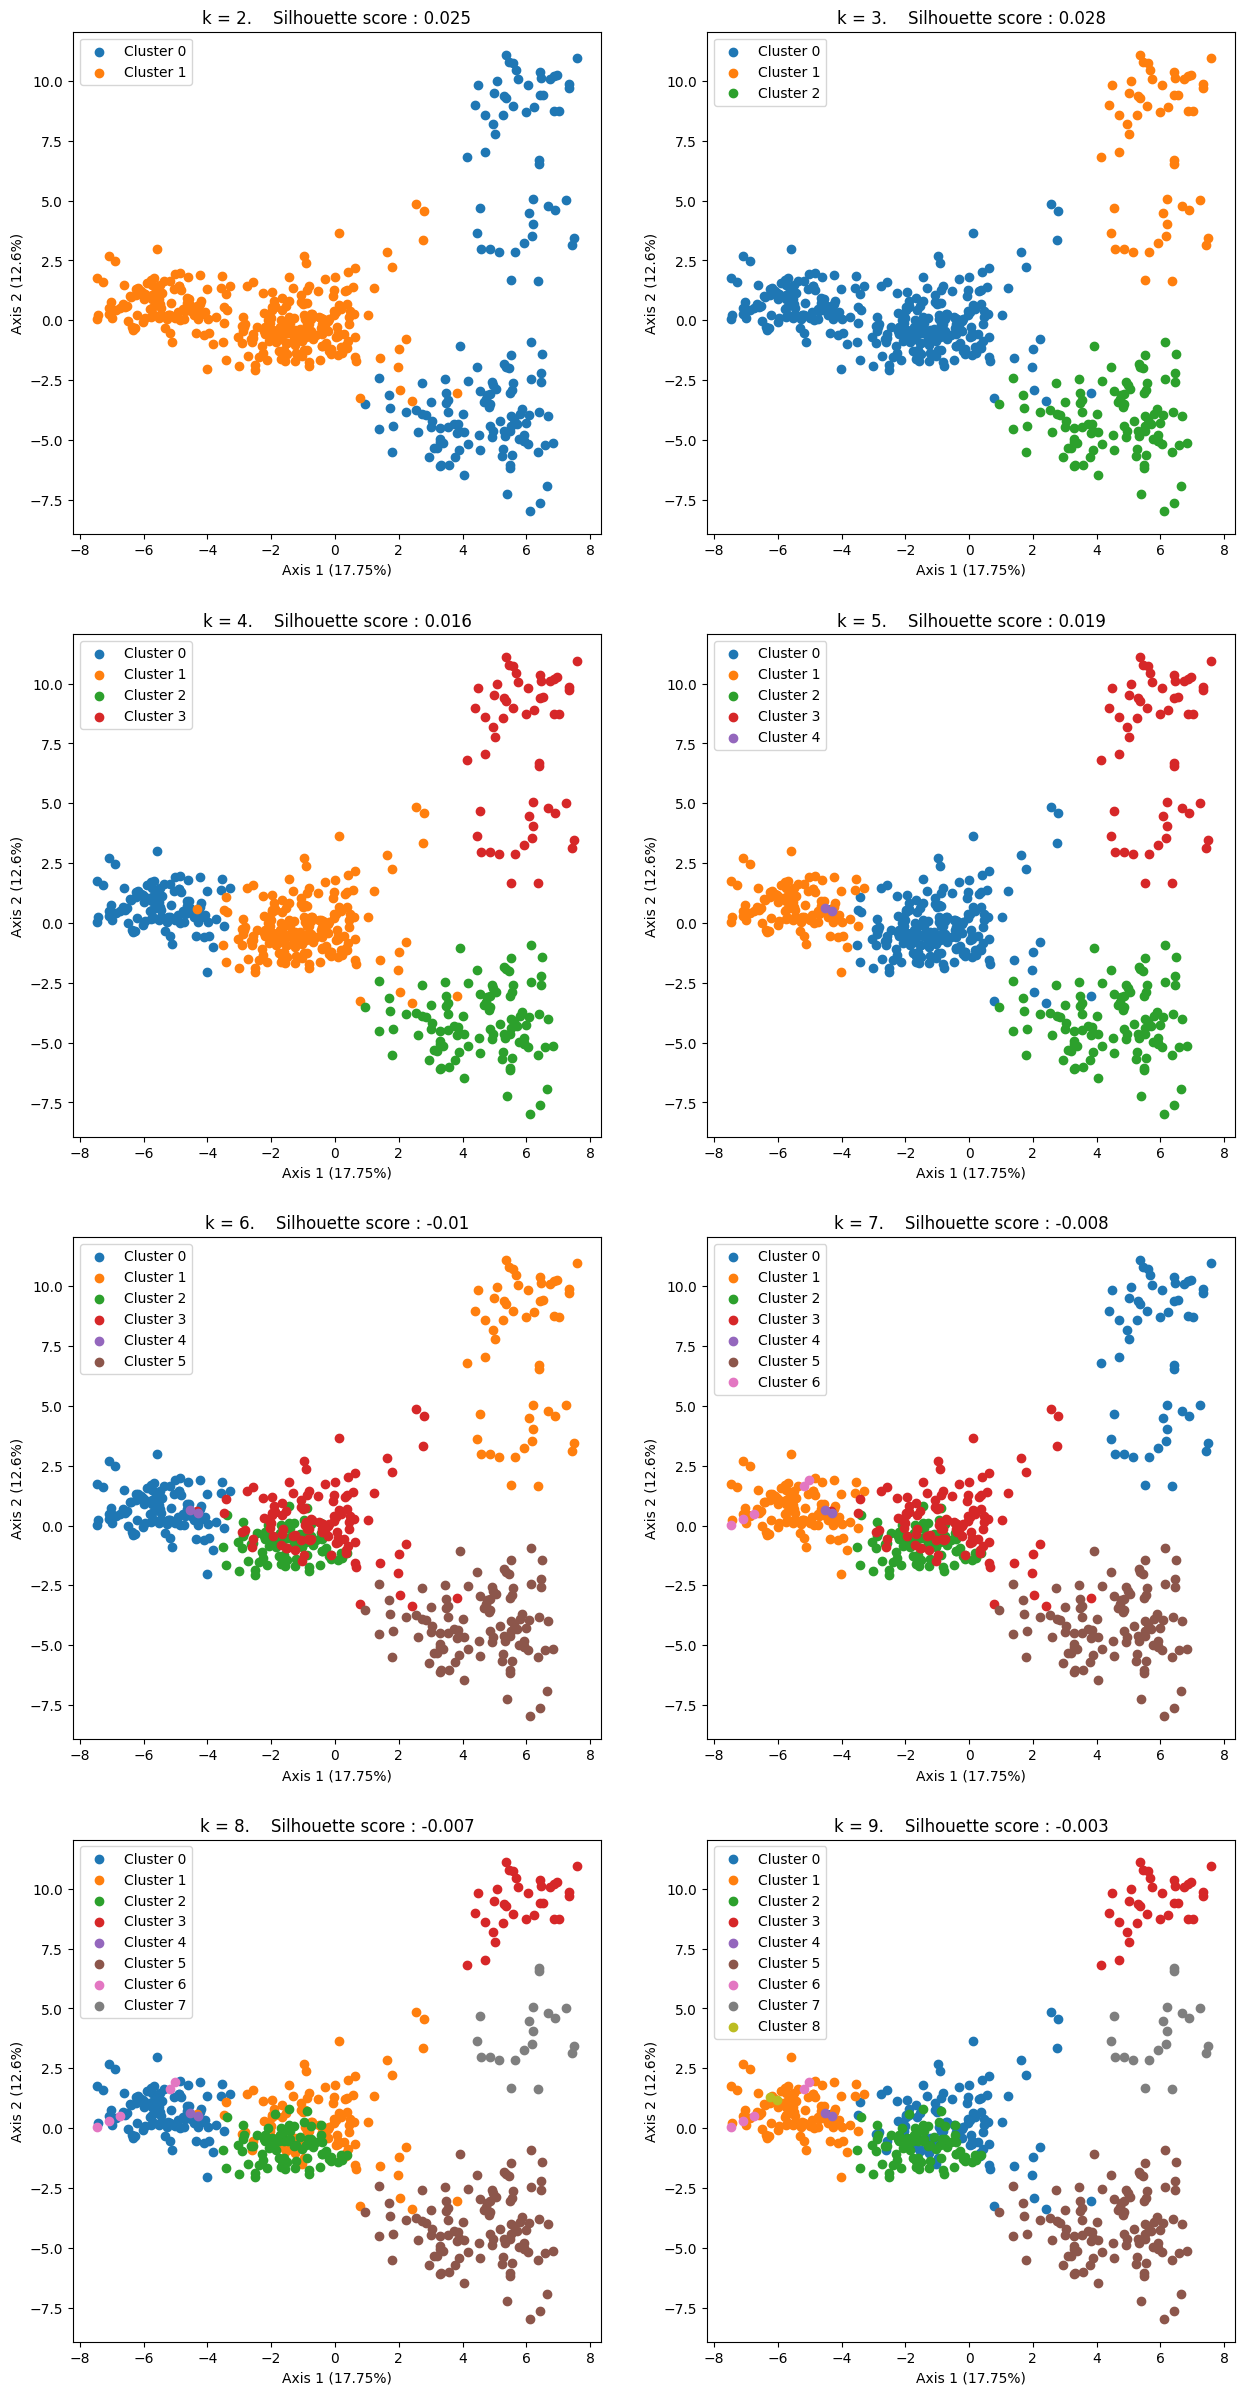

In [22]:
%%time
plt.figure(figsize=(15, 30))
for k in [2,3,4,5,6,7,8,9]:
    plt.subplot(4,2,k-1)
    hierarchial_and_plot(X,k)

### Dendrogram

In [10]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)


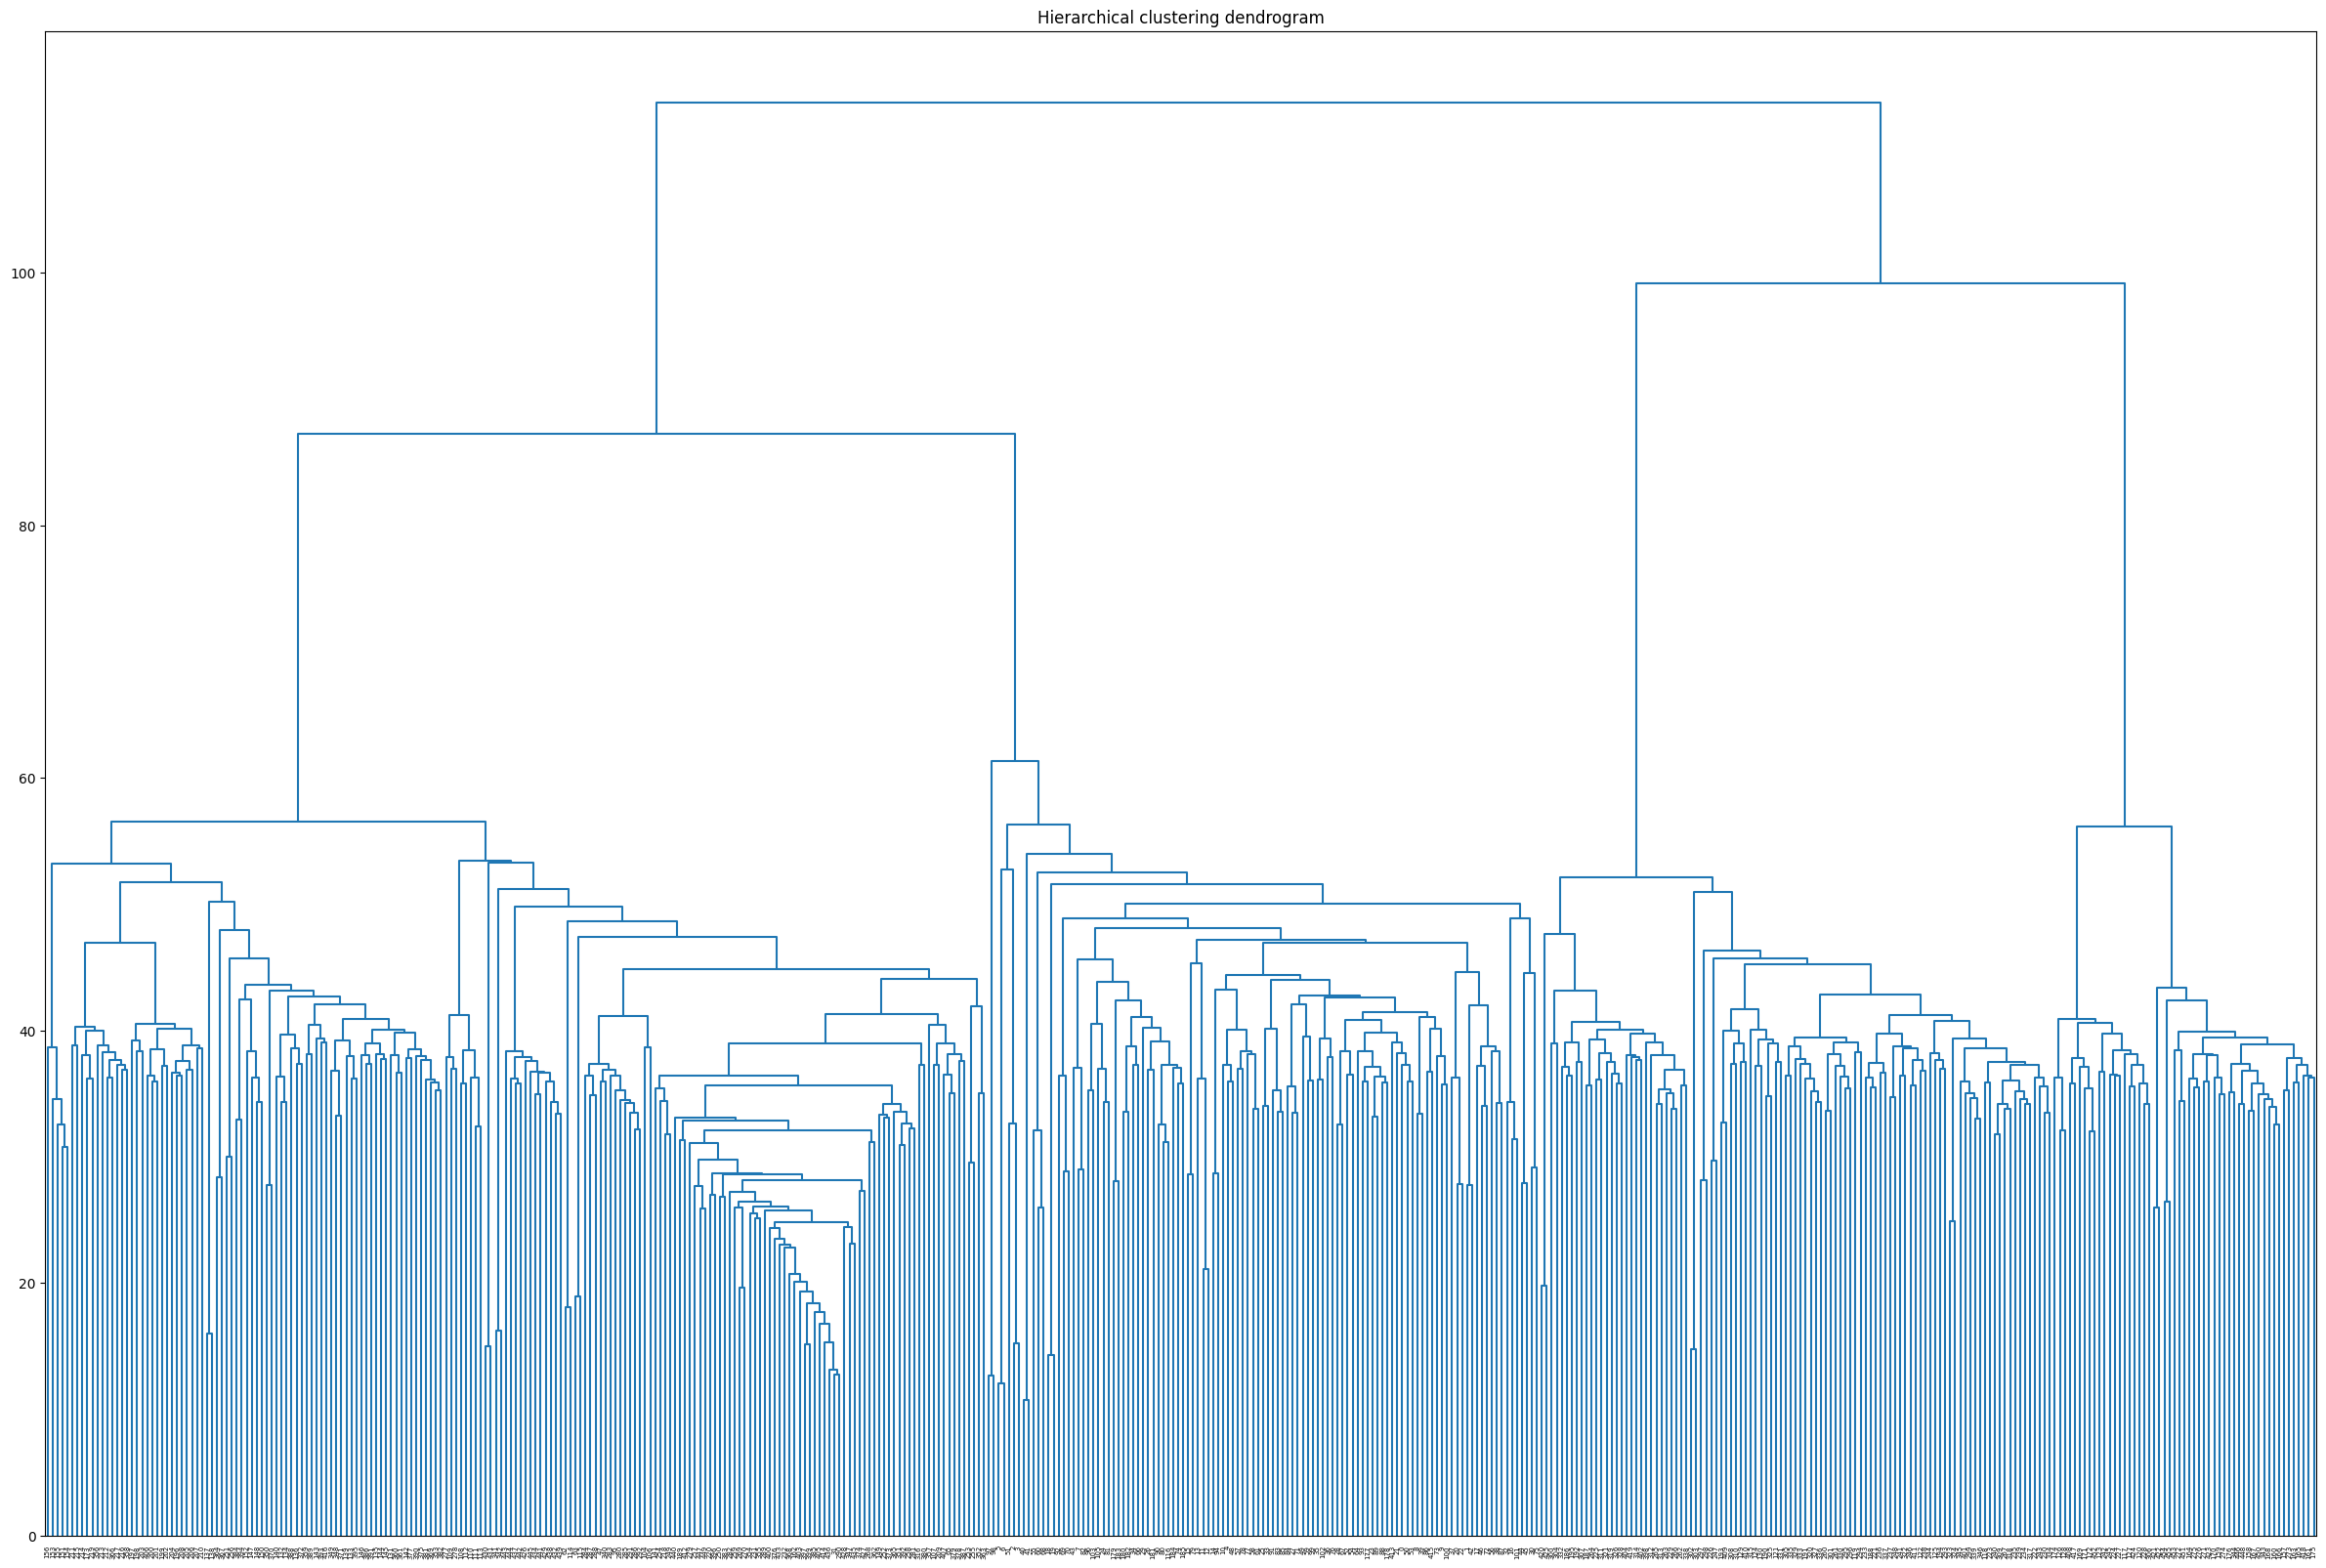

In [11]:
hierarchial = AgglomerativeClustering(n_clusters = None, 
                                     distance_threshold =0)
hierarchial.fit(X)

fig, ax = plt.subplots(figsize = (30,20))
ax.set_title("Hierarchical clustering dendrogram")
plot_dendrogram(hierarchial, truncate_mode=None, color_threshold=10)
plt.show()

### Mapping clusters geographically

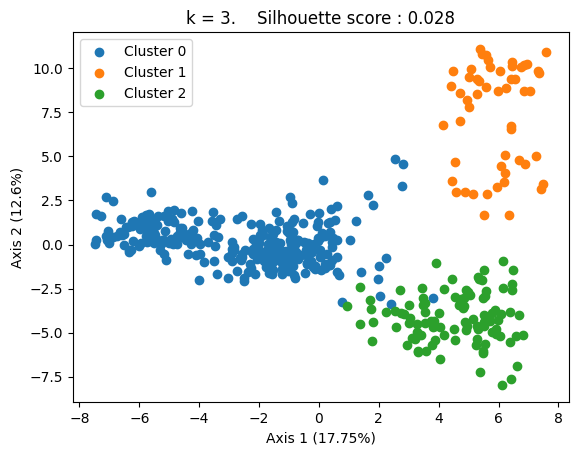

In [23]:
hierarchial_model = hierarchial_and_plot(X,3)

In [29]:
bamID_to_sampleID = pd.read_csv('./data/meta/bamID_to_sampleID.csv',header=None)
bamID_to_sampleID['cluster_assignment'] = hierarchial_model.labels_
bamID_to_sampleID = bamID_to_sampleID.rename(columns={1:'Sample_ID'})

In [30]:
bamID_to_sampleID

,0,Sample_ID,cluster_assignment
0,0,ucin246z,0
1,1,ucin213conc,0
2,2,ucin153conc,0
3,3,ucin266reconc,0
4,4,828RE,0
...,...,...,...
451,451,ucin349conc,1
452,452,ucin408re,1
453,453,ucin431z,1
454,454,818RE,1


In [32]:
geo_data = pd.read_csv('./data/meta/geo/locations.csv')
geo_data = geo_data.merge(bamID_to_sampleID, on='Sample_ID')

In [33]:
geo_data

,Sample_ID,latitude,longitude,0,cluster_assignment
0,101,38.393079,-86.600329,417,1
1,105,38.003470,-86.691263,130,2
2,109,38.083781,-86.647138,107,0
3,113,38.305098,-86.364769,78,0
4,116,38.369293,-86.337227,274,1
...,...,...,...,...,...
451,ucin433,47.578635,-92.514570,216,0
452,ucin434,41.002049,-93.274419,7,0
453,ucin435,41.822100,-90.578000,375,0
454,ucin436,43.331593,-92.120109,445,0


In [34]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [36]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(geo_data["longitude"], geo_data["latitude"])]
geodata=gpd.GeoDataFrame(geo_data,crs=crs, geometry=geometry)
usa_shapefile = gpd.read_file(r'./data/meta/geo/tl_rd22_us_state.shp')
river_tributary_shapefile = gpd.read_file(r'./data/meta/geo/ne_10m_rivers_north_america.shp')
river_primary_shapefile = gpd.read_file(r'./data/meta/geo/ne_10m_rivers_lake_centerlines.shp')

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/ds320/share/proj failed


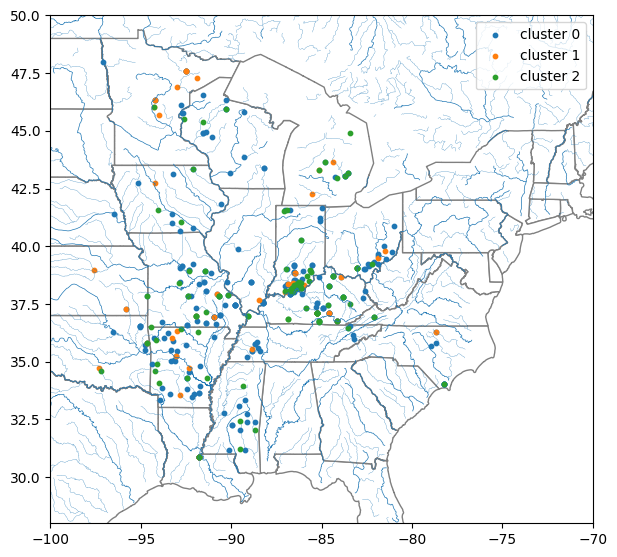

In [38]:
fig, ax = plt.subplots(figsize=(7,7))
usa_shapefile.plot(ax=ax, facecolor='White',edgecolor='gray', linewidth=1)
river_primary_shapefile.plot(ax=ax, linewidth=0.5)
river_tributary_shapefile.plot(ax=ax, linewidth=0.2)
ax.set_ylim([28, 50])
ax.set_xlim([-100, -70])

for cluster_idx in range(3):
        cluster = geodata.loc[geodata.cluster_assignment == cluster_idx]
        cluster.plot(ax=ax, markersize=10, label=f'cluster {cluster_idx}')
plt.legend()
plt.show()